## Import Library

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mping
import tensorflow as tf
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Fungsi set.seed digunakan untuk menentukan seed /random number generator agar data /ke acak an sesuatu bisa di atur sehingga antara percobaan pertama dan seterusnya menggunakan data acak yang sama.
np.random.seed(1234)
tf.random.set_seed(1234)
tf.keras.utils.set_random_seed(1234)

## Load & Preprocessing Data

Menampilkan gambar asli sebelum preprocessing

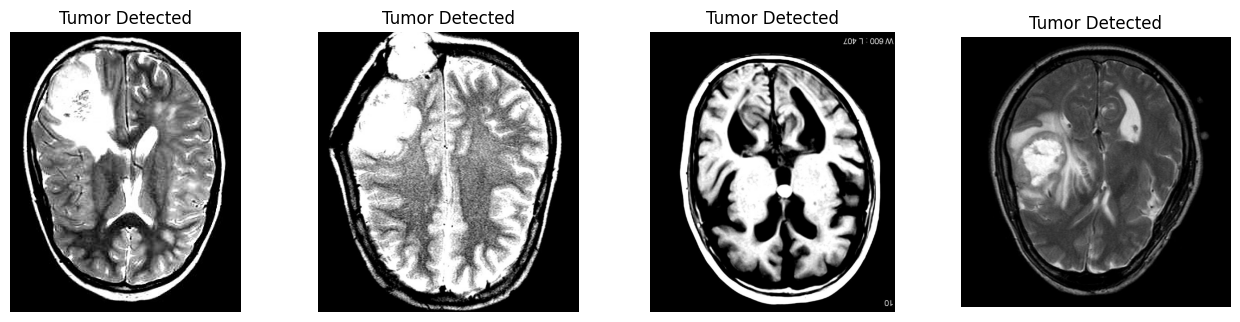

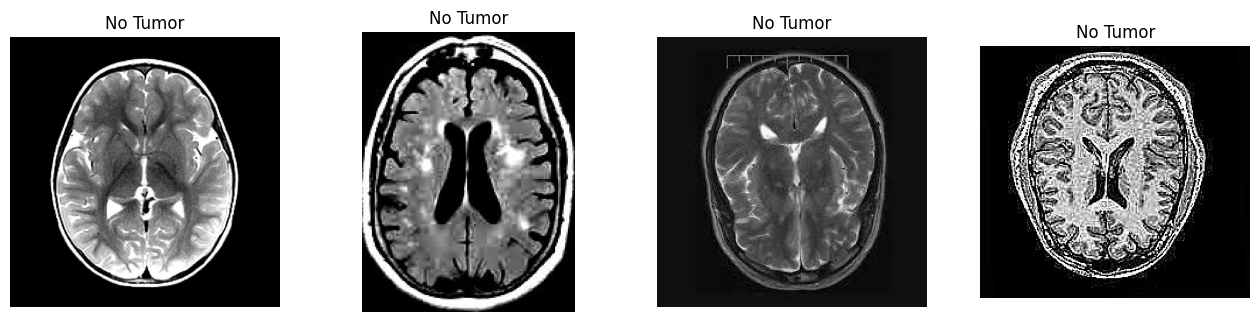

In [3]:
yes_tumor_images = os.listdir('Dataset/yes')
no_tumor_images  = os.listdir('Dataset/no')

fname1 = [os.path.join('Dataset/yes',fname) for fname in yes_tumor_images[0:4]] # berisi path untuk 4 gambar dari folder 'yes' 
fname2 = [os.path.join('Dataset/no',fname) for fname in no_tumor_images[0:4]] # berisi path untuk 4 gambar dari folder 'No'

ncolu = 4 # jumlah kolom
nrow  = 2 # jumlah baris
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4) # Ukuran grid yang ingin ditampilkan
for i,fname in enumerate(fname1): # gambar-gambar yang telah dipilih ditampilkan.
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Tumor Detected')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('No Tumor')
    plt.imshow(img)
    
plt.show()

In [4]:
dataset_path = 'Dataset/'

dataset = []
labels  = []
input_size = (64,64)

for x, i in enumerate(os.listdir(dataset_path)):
    new_dataset_path = dataset_path + str(i)
    for filename in os.listdir(new_dataset_path):
        if(filename.split('.')[1]=='jpg'):
            image_path = new_dataset_path + os.sep + filename
            
            print('Reading image', image_path, end='... ')
            image = cv2.imread(image_path)
            image = Image.fromarray(image,'RGB')
            
            print('Resizeing image', end='... ')
            image = image.resize(input_size)
            
            label = new_dataset_path.split('/')[-1]
            
            dataset.append(np.array(image))
            labels.append(label)
            print('Done.!')

Reading image Dataset/no\no0.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1.jpg... Resizeing image... Done.!
Reading image Dataset/no\no10.jpg... Resizeing image... Done.!
Reading image Dataset/no\no100.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1000.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1001.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1002.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1003.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1004.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1005.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1006.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1007.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1008.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1009.jpg... Resizeing image... Done.!
Reading image Dataset/no\no101.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1010.jpg

Reading image Dataset/no\no1130.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1131.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1132.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1133.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1134.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1135.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1136.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1137.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1138.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1139.jpg... Resizeing image... Done.!
Reading image Dataset/no\no114.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1140.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1141.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1142.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1143.jpg... Resizeing image... Done.!
Reading image Dataset/no\n

Reading image Dataset/no\no1270.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1271.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1272.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1273.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1274.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1275.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1276.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1277.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1278.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1279.jpg... Resizeing image... Done.!
Reading image Dataset/no\no128.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1280.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1281.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1282.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1283.jpg... Resizeing image... Done.!
Reading image Dataset/no\n

Reading image Dataset/no\no139.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1390.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1391.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1392.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1393.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1394.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1395.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1396.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1397.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1398.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1399.jpg... Resizeing image... Done.!
Reading image Dataset/no\No14.jpg... Resizeing image... Done.!
Reading image Dataset/no\no140.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1400.jpg... Resizeing image... Done.!
Reading image Dataset/no\no1401.jpg... Resizeing image... Done.!
Reading image Dataset/no\no14

Reading image Dataset/no\no160.jpg... Resizeing image... Done.!
Reading image Dataset/no\no161.jpg... Resizeing image... Done.!
Reading image Dataset/no\no162.jpg... Resizeing image... Done.!
Reading image Dataset/no\no163.jpg... Resizeing image... Done.!
Reading image Dataset/no\no164.jpg... Resizeing image... Done.!
Reading image Dataset/no\no165.jpg... Resizeing image... Done.!
Reading image Dataset/no\no166.jpg... Resizeing image... Done.!
Reading image Dataset/no\no167.jpg... Resizeing image... Done.!
Reading image Dataset/no\no168.jpg... Resizeing image... Done.!
Reading image Dataset/no\no169.jpg... Resizeing image... Done.!
Reading image Dataset/no\No17.jpg... Resizeing image... Done.!
Reading image Dataset/no\no170.jpg... Resizeing image... Done.!
Reading image Dataset/no\no171.jpg... Resizeing image... Done.!
Reading image Dataset/no\no172.jpg... Resizeing image... Done.!
Reading image Dataset/no\no173.jpg... Resizeing image... Done.!
Reading image Dataset/no\no174.jpg... Res

Reading image Dataset/no\no309.jpg... Resizeing image... Done.!
Reading image Dataset/no\no31.jpg... Resizeing image... Done.!
Reading image Dataset/no\no310.jpg... Resizeing image... Done.!
Reading image Dataset/no\no311.jpg... Resizeing image... Done.!
Reading image Dataset/no\no312.jpg... Resizeing image... Done.!
Reading image Dataset/no\no313.jpg... Resizeing image... Done.!
Reading image Dataset/no\no314.jpg... Resizeing image... Done.!
Reading image Dataset/no\no315.jpg... Resizeing image... Done.!
Reading image Dataset/no\no316.jpg... Resizeing image... Done.!
Reading image Dataset/no\no317.jpg... Resizeing image... Done.!
Reading image Dataset/no\no318.jpg... Resizeing image... Done.!
Reading image Dataset/no\no319.jpg... Resizeing image... Done.!
Reading image Dataset/no\no32.jpg... Resizeing image... Done.!
Reading image Dataset/no\no320.jpg... Resizeing image... Done.!
Reading image Dataset/no\no321.jpg... Resizeing image... Done.!
Reading image Dataset/no\no322.jpg... Resi

Reading image Dataset/no\no424.jpg... Resizeing image... Done.!
Reading image Dataset/no\no425.jpg... Resizeing image... Done.!
Reading image Dataset/no\no426.jpg... Resizeing image... Done.!
Reading image Dataset/no\no427.jpg... Resizeing image... Done.!
Reading image Dataset/no\no428.jpg... Resizeing image... Done.!
Reading image Dataset/no\no429.jpg... Resizeing image... Done.!
Reading image Dataset/no\no43.jpg... Resizeing image... Done.!
Reading image Dataset/no\no430.jpg... Resizeing image... Done.!
Reading image Dataset/no\no431.jpg... Resizeing image... Done.!
Reading image Dataset/no\no432.jpg... Resizeing image... Done.!
Reading image Dataset/no\no433.jpg... Resizeing image... Done.!
Reading image Dataset/no\no434.jpg... Resizeing image... Done.!
Reading image Dataset/no\no435.jpg... Resizeing image... Done.!
Reading image Dataset/no\no436.jpg... Resizeing image... Done.!
Reading image Dataset/no\no437.jpg... Resizeing image... Done.!
Reading image Dataset/no\no438.jpg... Res

Reading image Dataset/no\no562.jpg... Resizeing image... Done.!
Reading image Dataset/no\no563.jpg... Resizeing image... Done.!
Reading image Dataset/no\no564.jpg... Resizeing image... Done.!
Reading image Dataset/no\no565.jpg... Resizeing image... Done.!
Reading image Dataset/no\no566.jpg... Resizeing image... Done.!
Reading image Dataset/no\no567.jpg... Resizeing image... Done.!
Reading image Dataset/no\no568.jpg... Resizeing image... Done.!
Reading image Dataset/no\no569.jpg... Resizeing image... Done.!
Reading image Dataset/no\no57.jpg... Resizeing image... Done.!
Reading image Dataset/no\no570.jpg... Resizeing image... Done.!
Reading image Dataset/no\no571.jpg... Resizeing image... Done.!
Reading image Dataset/no\no572.jpg... Resizeing image... Done.!
Reading image Dataset/no\no573.jpg... Resizeing image... Done.!
Reading image Dataset/no\no574.jpg... Resizeing image... Done.!
Reading image Dataset/no\no575.jpg... Resizeing image... Done.!
Reading image Dataset/no\no576.jpg... Res

Reading image Dataset/no\no68.jpg... Resizeing image... Done.!
Reading image Dataset/no\no680.jpg... Resizeing image... Done.!
Reading image Dataset/no\no681.jpg... Resizeing image... Done.!
Reading image Dataset/no\no682.jpg... Resizeing image... Done.!
Reading image Dataset/no\no683.jpg... Resizeing image... Done.!
Reading image Dataset/no\no684.jpg... Resizeing image... Done.!
Reading image Dataset/no\no685.jpg... Resizeing image... Done.!
Reading image Dataset/no\no686.jpg... Resizeing image... Done.!
Reading image Dataset/no\no687.jpg... Resizeing image... Done.!
Reading image Dataset/no\no688.jpg... Resizeing image... Done.!
Reading image Dataset/no\no689.jpg... Resizeing image... Done.!
Reading image Dataset/no\no69.jpg... Resizeing image... Done.!
Reading image Dataset/no\no690.jpg... Resizeing image... Done.!
Reading image Dataset/no\no691.jpg... Resizeing image... Done.!
Reading image Dataset/no\no692.jpg... Resizeing image... Done.!
Reading image Dataset/no\no693.jpg... Resi

Reading image Dataset/no\no8.jpg... Resizeing image... Done.!
Reading image Dataset/no\no80.jpg... Resizeing image... Done.!
Reading image Dataset/no\no800.jpg... Resizeing image... Done.!
Reading image Dataset/no\no801.jpg... Resizeing image... Done.!
Reading image Dataset/no\no802.jpg... Resizeing image... Done.!
Reading image Dataset/no\no803.jpg... Resizeing image... Done.!
Reading image Dataset/no\no804.jpg... Resizeing image... Done.!
Reading image Dataset/no\no805.jpg... Resizeing image... Done.!
Reading image Dataset/no\no806.jpg... Resizeing image... Done.!
Reading image Dataset/no\no807.jpg... Resizeing image... Done.!
Reading image Dataset/no\no808.jpg... Resizeing image... Done.!
Reading image Dataset/no\no809.jpg... Resizeing image... Done.!
Reading image Dataset/no\no81.jpg... Resizeing image... Done.!
Reading image Dataset/no\no810.jpg... Resizeing image... Done.!
Reading image Dataset/no\no811.jpg... Resizeing image... Done.!
Reading image Dataset/no\no812.jpg... Resize

Reading image Dataset/no\no926.jpg... Resizeing image... Done.!
Reading image Dataset/no\no927.jpg... Resizeing image... Done.!
Reading image Dataset/no\no928.jpg... Resizeing image... Done.!
Reading image Dataset/no\no929.jpg... Resizeing image... Done.!
Reading image Dataset/no\no93.jpg... Resizeing image... Done.!
Reading image Dataset/no\no930.jpg... Resizeing image... Done.!
Reading image Dataset/no\no931.jpg... Resizeing image... Done.!
Reading image Dataset/no\no932.jpg... Resizeing image... Done.!
Reading image Dataset/no\no933.jpg... Resizeing image... Done.!
Reading image Dataset/no\no934.jpg... Resizeing image... Done.!
Reading image Dataset/no\no935.jpg... Resizeing image... Done.!
Reading image Dataset/no\no936.jpg... Resizeing image... Done.!
Reading image Dataset/no\no937.jpg... Resizeing image... Done.!
Reading image Dataset/no\no938.jpg... Resizeing image... Done.!
Reading image Dataset/no\no939.jpg... Resizeing image... Done.!
Reading image Dataset/no\no94.jpg... Resi

Reading image Dataset/yes\y1047.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1048.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1049.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y105.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1050.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1051.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1052.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1053.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1054.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1055.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1056.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1057.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1058.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1059.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y106.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y

Reading image Dataset/yes\y1165.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1166.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1167.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1168.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1169.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y117.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1170.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1171.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1172.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1173.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1174.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1175.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1176.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1177.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1178.jpg... Resizeing image... Done.!
Reading image Dataset/yes\

Reading image Dataset/yes\y1281.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1282.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1283.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1284.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1285.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1286.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1287.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1288.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1289.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y129.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1290.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1291.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1292.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1293.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1294.jpg... Resizeing image... Done.!
Reading image Dataset/yes\

Reading image Dataset/yes\y1405.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1406.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1407.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1408.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1409.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y141.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1410.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1411.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1412.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1413.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1414.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1415.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1416.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1417.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y1418.jpg... Resizeing image... Done.!
Reading image Dataset/yes\

Reading image Dataset/yes\y174.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y175.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y176.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y177.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y178.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y179.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y18.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y180.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y181.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y182.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y183.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y184.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y185.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y186.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y187.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y188.jpg... Res

Reading image Dataset/yes\y313.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y314.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y315.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y316.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y317.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y318.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y319.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y32.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y320.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y321.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y322.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y323.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y324.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y325.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y326.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y327.jpg... Res

Reading image Dataset/yes\y440.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y441.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y442.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y443.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y444.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y445.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y446.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y447.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y448.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y449.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y45.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y450.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y451.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y452.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y453.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y454.jpg... Res

Reading image Dataset/yes\y573.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y574.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y575.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y576.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y577.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y578.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y579.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y58.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y580.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y581.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y582.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y583.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y584.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y585.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y586.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y587.jpg... Res

Reading image Dataset/yes\y690.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y691.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y692.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y693.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y694.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y695.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y696.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y697.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y698.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y699.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y7.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y70.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y700.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y701.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y702.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y703.jpg... Resiz

Reading image Dataset/yes\y819.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y82.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y820.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y821.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y822.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y823.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y824.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y825.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y826.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y827.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y828.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y829.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y83.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y830.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y831.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y832.jpg... Resi

Reading image Dataset/yes\y938.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y939.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y94.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y940.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y941.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y942.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y943.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y944.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y945.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y946.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y947.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y948.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y949.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y95.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y950.jpg... Resizeing image... Done.!
Reading image Dataset/yes\y951.jpg... Resi

In [5]:
#convert list to numpy array
dataset = np.array(dataset)
labels   = np.array(labels)

print('Dataset : ',len(dataset))
print('Label   : ',len(labels))

Dataset :  3000
Label   :  3000


In [6]:
labels

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype='<U3')

In [7]:
le = LabelEncoder()
y = le.fit_transform(labels)
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Train Test-Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=0)
print('X_train data shape : ', X_train.shape)
print('X_test data shape  : ', X_test.shape)

X_train data shape :  (2400, 64, 64, 3)
X_test data shape  :  (600, 64, 64, 3)


## Normalize the Data

In [9]:
X_train = normalize(X_train, axis=1)
X_test  = normalize(X_test, axis=1)

## Building CNN Model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation ='relu',input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation ='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation ='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Model Fit

In [12]:
callbacks = [ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True),
              EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)] # Menghentikan pelatihan ketika val_accuracy tidak membaik selama 5 epoch

# patience: jumlah epoch tanpa peningkatan setelah itu tingkat pembelajaran akan dikurangi.
# EarlyStopping: menghentikan pelatihan saat metrik yang dipantau berhenti membaik.
# ModelCheckpoint: untuk menyimpan model atau bobot pada interval tertentu, sehingga model atau bobot dapat dimuat nanti untuk melanjutkan pelatihan dari keadaan yang disimpan.
# save_best_only=True: hanya menyimpan ketika model dianggap "terbaik" dan model terbaik terbaru menurut kuantitas yang dipantau tidak akan ditimpa

In [14]:
model.fit(X_train, y_train,
          epochs=100,
          validation_data = (X_test, y_test),
          callbacks = callbacks)

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.5774 - accuracy: 0.7021
Epoch 1: val_accuracy improved from -inf to 0.76167, saving model to best_model.h5


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 11s 129ms/step - loss: 0.5774 - accuracy: 0.7021 - val_loss: 0.4785 - val_accuracy: 0.7617
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.4643 - accuracy: 0.7862
Epoch 2: val_accuracy improved from 0.76167 to 0.80333, saving model to best_model.h5
75/75 [==============================] - 11s 140ms/step - loss: 0.4643 - accuracy: 0.7862 - val_loss: 0.4227 - val_accuracy: 0.8033
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.3797 - accuracy: 0.8363
Epoch 3: val_accuracy improved from 0.80333 to 0.82833, saving model to best_model.h5
75/75 [==============================] - 10s 139ms/step - loss: 0.3797 - accuracy: 0.8363 - val_loss: 0.3485 - val_accuracy: 0.8283
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.3142 - accuracy: 0.8662
Epoch 4: val_accuracy improved from 0.82833 to 0.84000, saving model to best_model.h5
75/75 [==============================] - 9s 123ms/step - loss

## Model Evaluate

In [15]:
n_model = load_model('best_model.h5')

In [16]:
y_pred = n_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

19/19 [==============================] - 1s 26ms/step


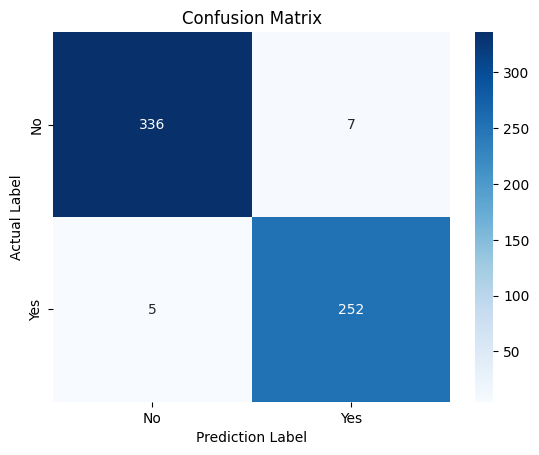

In [17]:
cm           = confusion_matrix(y_test, y_pred, labels=[0, 1])
class_label  = ['No', 'Yes']
df_confusion = pd.DataFrame(cm, index = class_label, columns = class_label)

sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [18]:
_accuracy   = round(accuracy_score(y_test, y_pred)*100, 2)
_precission = round(precision_score(y_test, y_pred)*100, 2)
_recall     = round(recall_score(y_test, y_pred)*100, 2)
_fscore     = round(f1_score(y_test, y_pred)*100, 2)

print('Accuracy   :', _accuracy, '%')
print('Precission :', _precission, '%')
print('Recall     :', _recall, '%')
print('F-Score    :', _fscore, '%')

Accuracy   : 98.0 %
Precission : 97.3 %
Recall     : 98.05 %
F-Score    : 97.67 %
